In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math
import seaborn as sns
from sklearn.cluster import DBSCAN
import math


# Carregue os dados do arquivo CSV com cabeçalho
df = pd.read_csv('Base5.csv')

display(df)

# Crie as variáveis p0 e p1 com base na coluna 'label'
p0 = df[df['label'] == 0]
p1 = df[df['label'] == 1]


print("Análise Descritiva dos dados")
print("P0: ", len(p0))
print("P1: ", len(p1))

# Calcular o desvio padrão para as classes 0 e 1 nas colunas 'x' e 'y'
std_p0_x = p0['x'].std()
std_p0_y = p0['y'].std()

std_p1_x = p1['x'].std()
std_p1_y = p1['y'].std()

print("\n")

print("Desvio Padrão Classe 0 em (x):", std_p0_x)
print("Desvio Padrão Classe 0 em (y):", std_p0_y)

print("Desvio Padrão Classe 1 em (x):", std_p1_x)
print("Desvio Padrão Classe 1 em (y):", std_p1_y)

# Calcular o ponto médio para a classe 0
p0_xM = p0['x'].mean()
p0_yM = p0['y'].mean()

# Calcular o ponto médio para a classe 1
p1_xM = p1['x'].mean()
p1_yM = p1['y'].mean()

print("\n")

print("Ponto Médio Classe 0 (x):", p0_xM)
print("Ponto Médio Classe 0 (y):", p0_yM)

print("Ponto Médio Classe 1 (x):", p1_xM)
print("Ponto Médio Classe 1 (y):", p1_yM)




,x,y,label
0,-8.806930,7.248033,0
1,-10.450622,5.293447,0
2,-0.833457,3.721687,1
3,-7.800044,5.891239,0
4,-6.628308,7.540552,0
...,...,...,...
1995,-2.915128,5.236034,1
1996,-0.136114,3.775187,1
1997,-7.934534,7.192954,0
1998,-5.343402,1.998966,0


Análise Descritiva dos dados
P0:  1000
P1:  1000


Desvio Padrão Classe 0 em (x): 1.5856666420790513
Desvio Padrão Classe 0 em (y): 1.5740545313902738
Desvio Padrão Classe 1 em (x): 1.5830495993869969
Desvio Padrão Classe 1 em (y): 1.590703145099291


Ponto Médio Classe 0 (x): -8.47104275142981
Ponto Médio Classe 0 (y): 5.476883540602863
Ponto Médio Classe 1 (x): -1.2526423890509515
Ponto Médio Classe 1 (y): 4.495774234215612


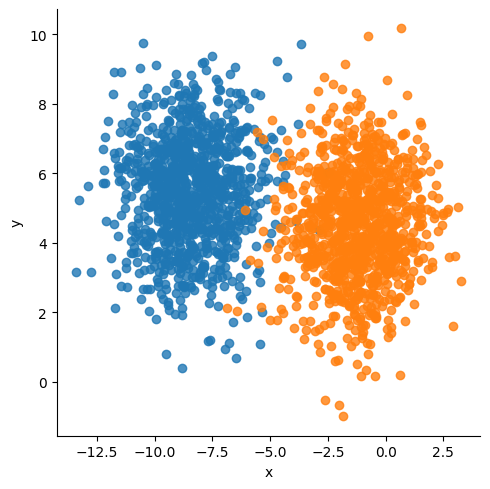

              x         y  label
0     -8.806930  7.248033      0
1    -10.450622  5.293447      0
2     -0.833457  3.721687      1
3     -7.800044  5.891239      0
4     -6.628308  7.540552      0
...         ...       ...    ...
1995  -2.915128  5.236034      1
1996  -0.136114  3.775187      1
1997  -7.934534  7.192954      0
1998  -5.343402  1.998966      0
1999  -2.722987  5.052266      1

[2000 rows x 3 columns]
0       -8.806930
1      -10.450622
2       -0.833457
3       -7.800044
4       -6.628308
          ...    
1995    -2.915128
1996    -0.136114
1997    -7.934534
1998    -5.343402
1999    -2.722987
Name: x, Length: 2000, dtype: float64


In [38]:
dados = pd.read_csv("Base5.csv")
df_dados = pd.DataFrame(dados)
sns.lmplot( x="x", y="y", data=df, fit_reg=False, hue='label', legend=False)
plt.show()
print(df_dados)
print(df_dados['x'])

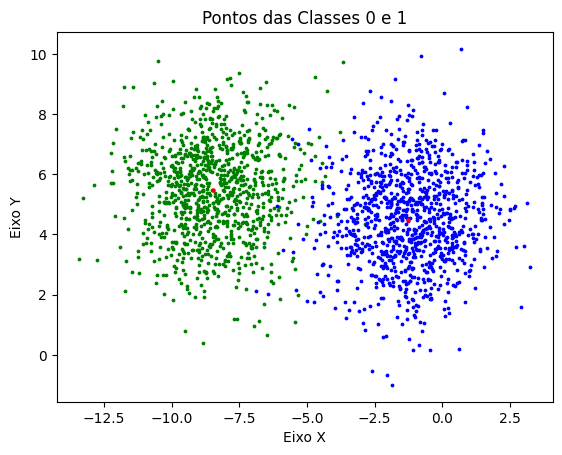

In [39]:
# Extraia as coordenadas x e y das classes p0 e p1
p0_x = p0['x']
p0_y = p0['y']

p1_x = p1['x']
p1_y = p1['y']

# Plote os pontos das classes p0 e p1
plt.scatter(p0_x, p0_y, label='Classe 0', s=3, c='green')
plt.scatter(p1_x, p1_y, label='Classe 1', s=3, c='blue')

# Plote os centros de massa com pontos menores
plt.scatter(p0_xM, p0_yM, label='Centro 0', s=5, c='red')
plt.scatter(p1_xM, p1_yM, label='Centro 1', s=5, c='red')


# Defina os rótulos dos eixos e o título do gráfico
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Pontos das Classes 0 e 1')

# Adicione uma legenda e ajuste sua posição
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))



plt.savefig('Graficos/PlotOriginal.png', dpi = 500)
# Exiba o gráfico
plt.show()

In [40]:
def plotagraficos (opiniao,modelo):
  f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(15,5))
  ax1.set_title(label=modelo)
  ax1.scatter(df['x'],df['y'],c=opiniao,cmap="rainbow")
  ax2.set_title("Original")
  ax2.scatter(df['x'],df['y'],c=df['label'],cmap="rainbow")


# KMeans

c:\Users\Bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

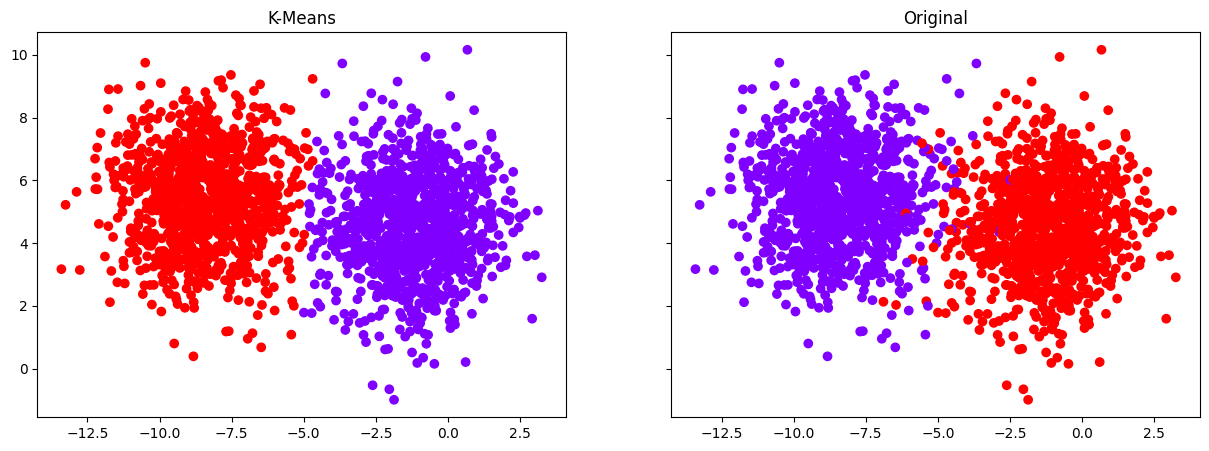

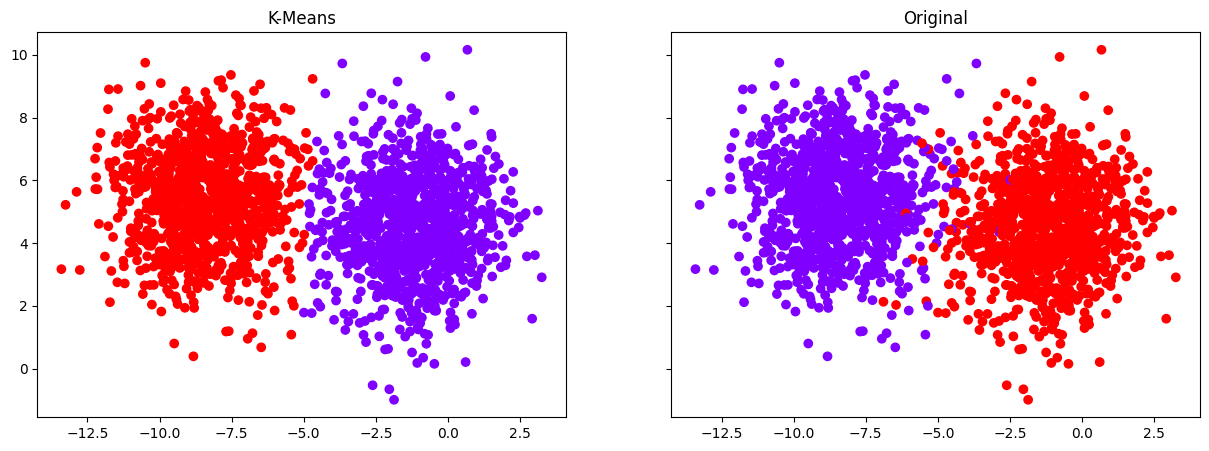

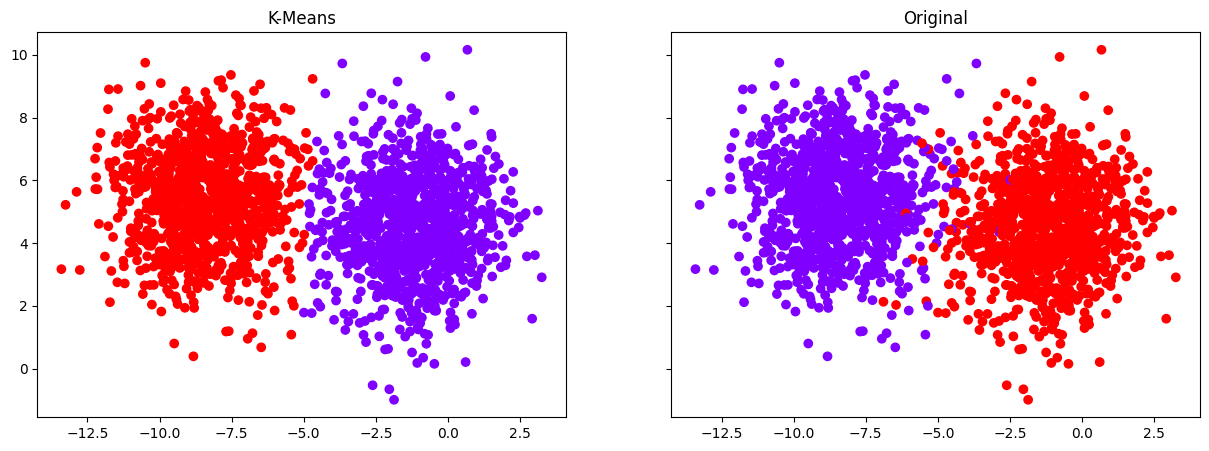

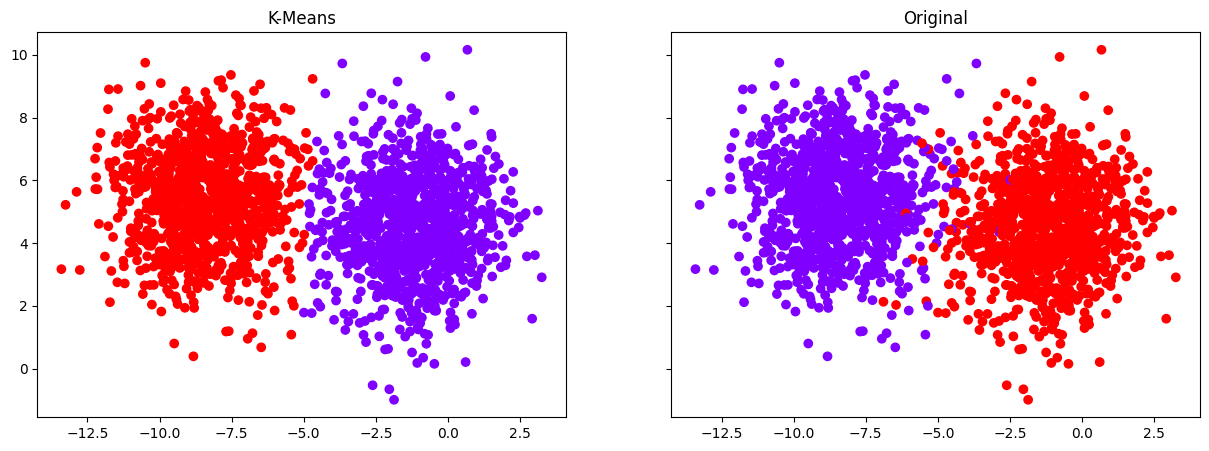

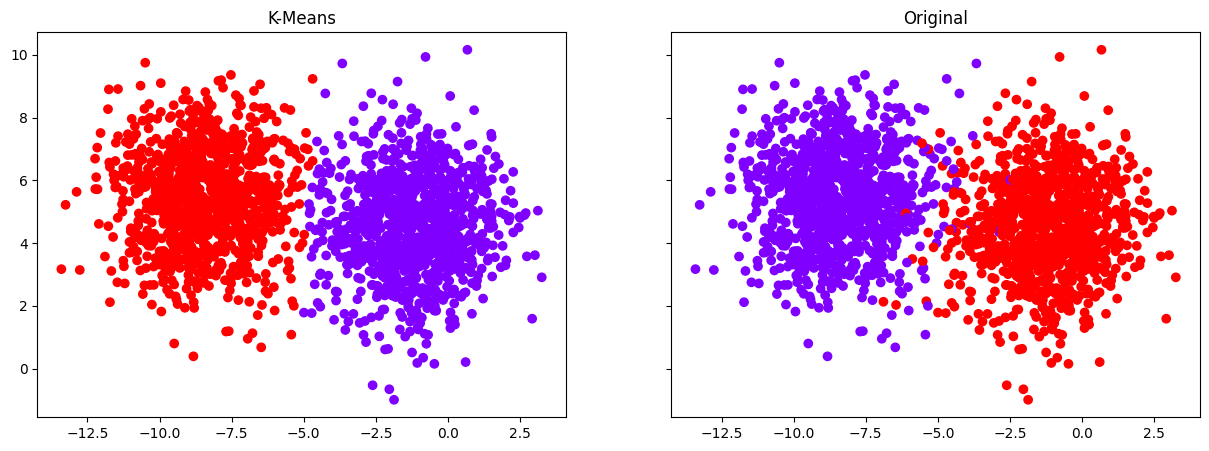

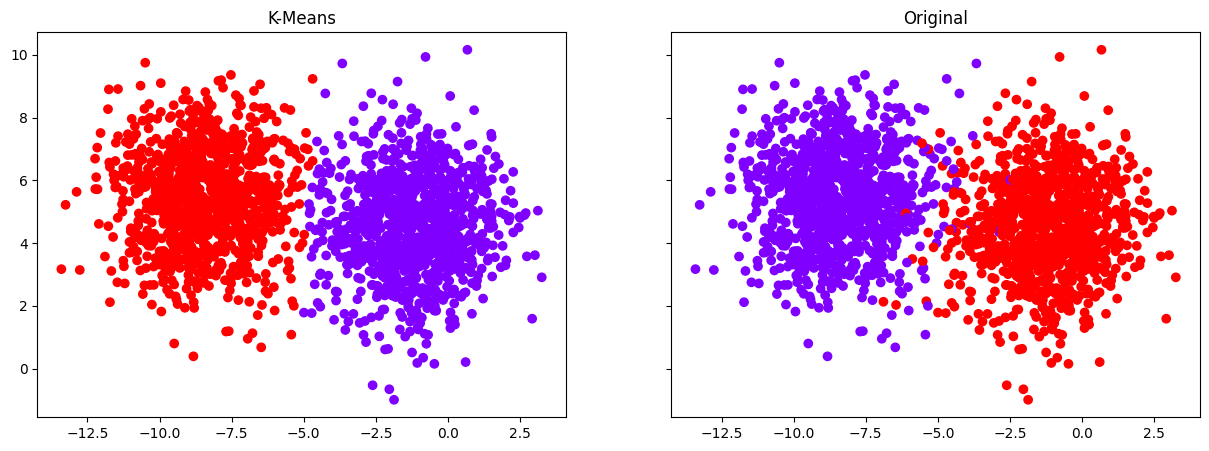

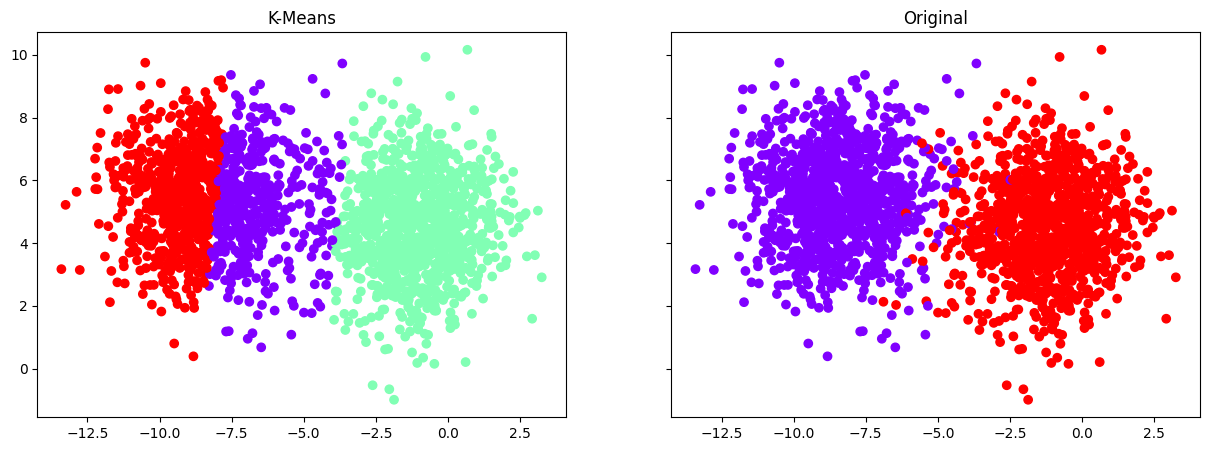

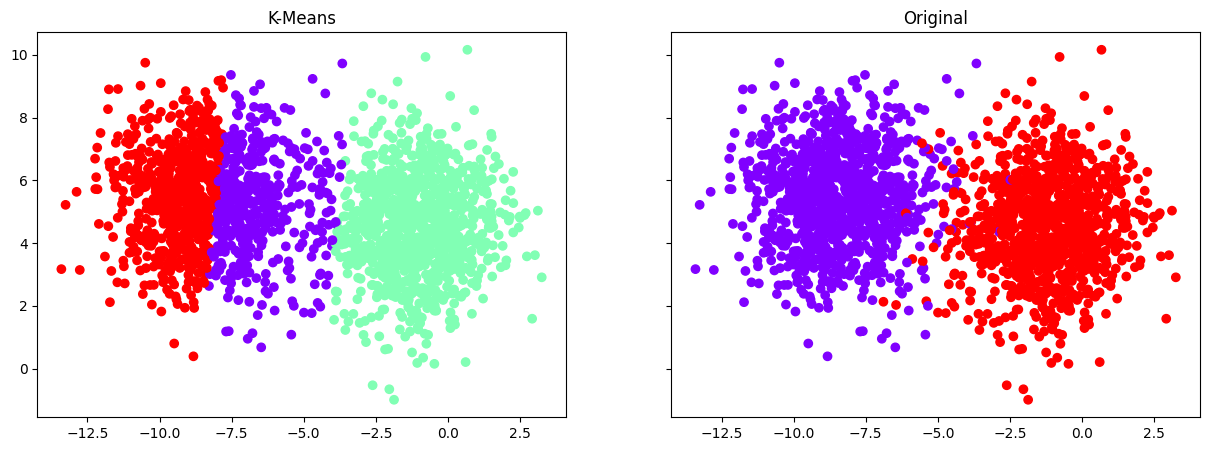

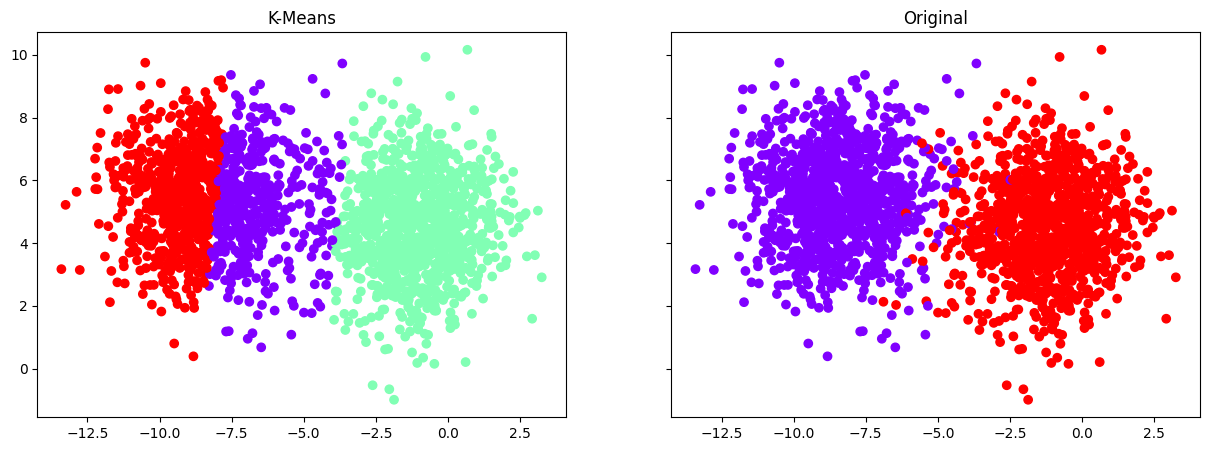

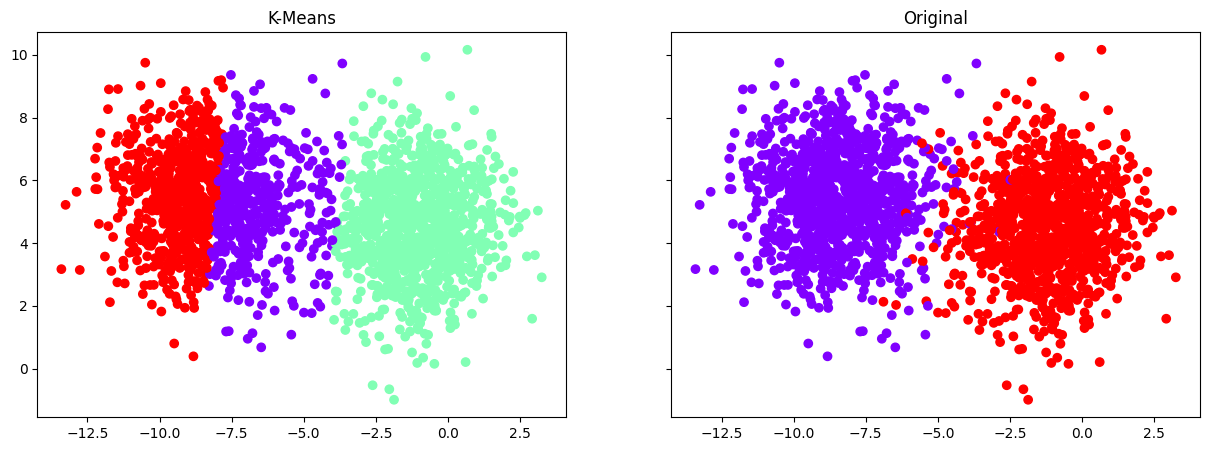

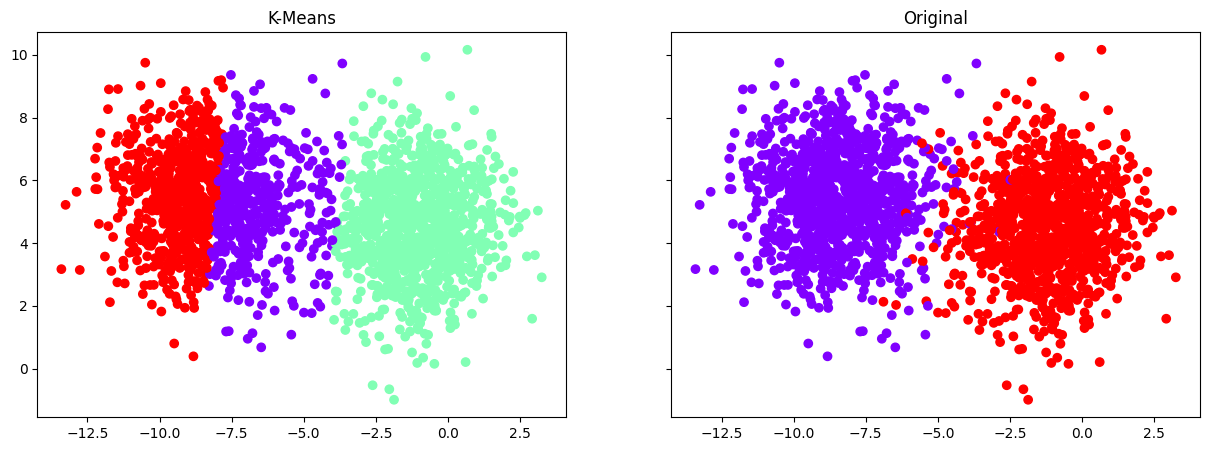

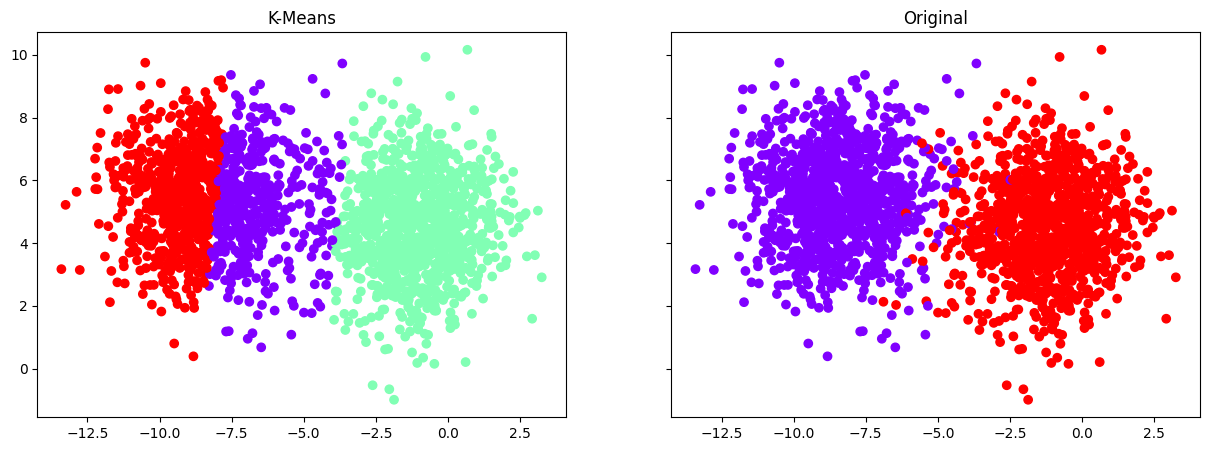

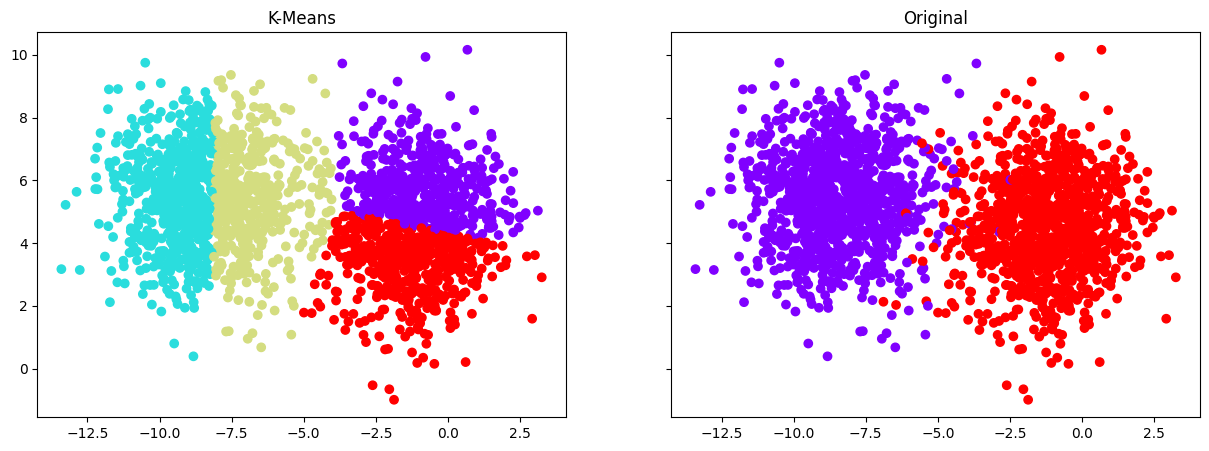

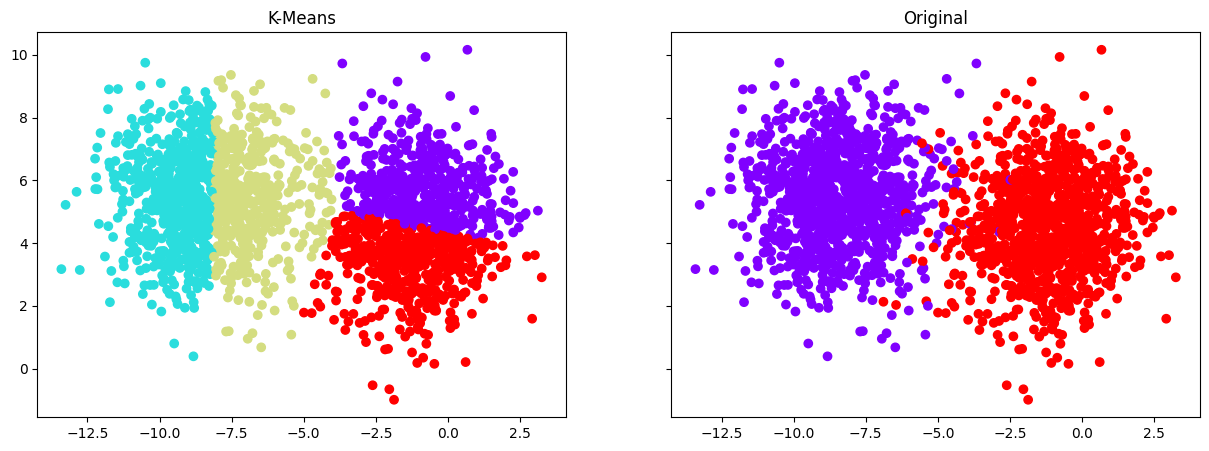

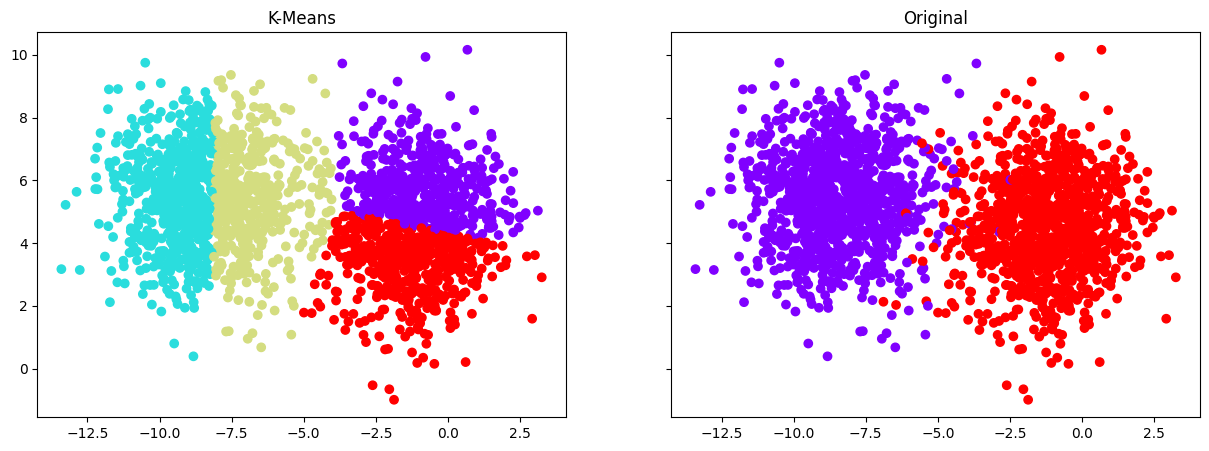

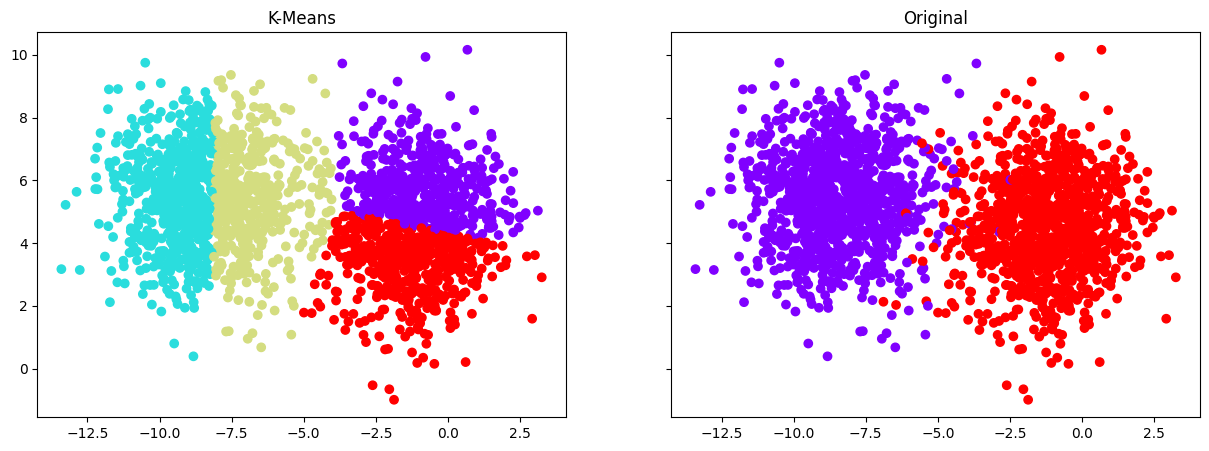

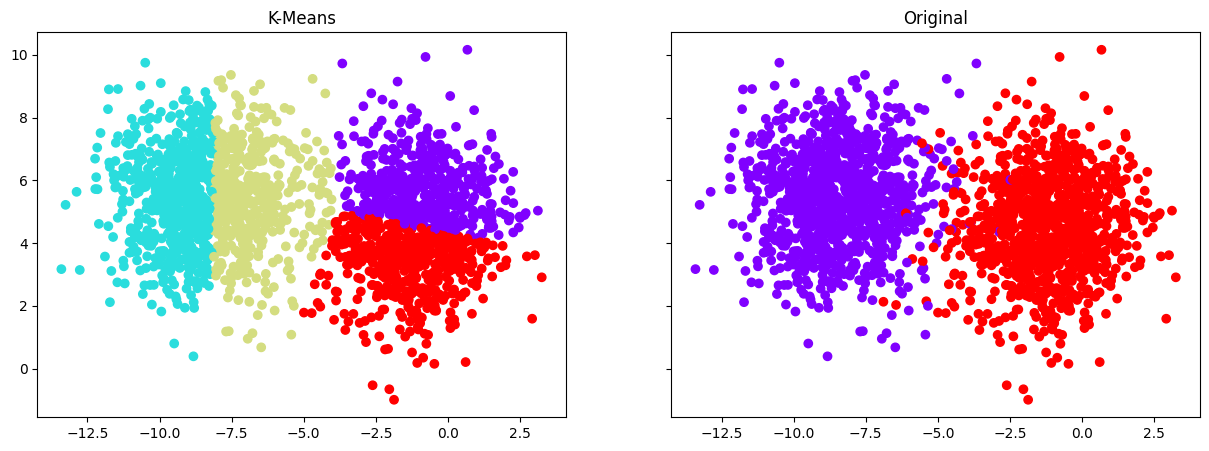

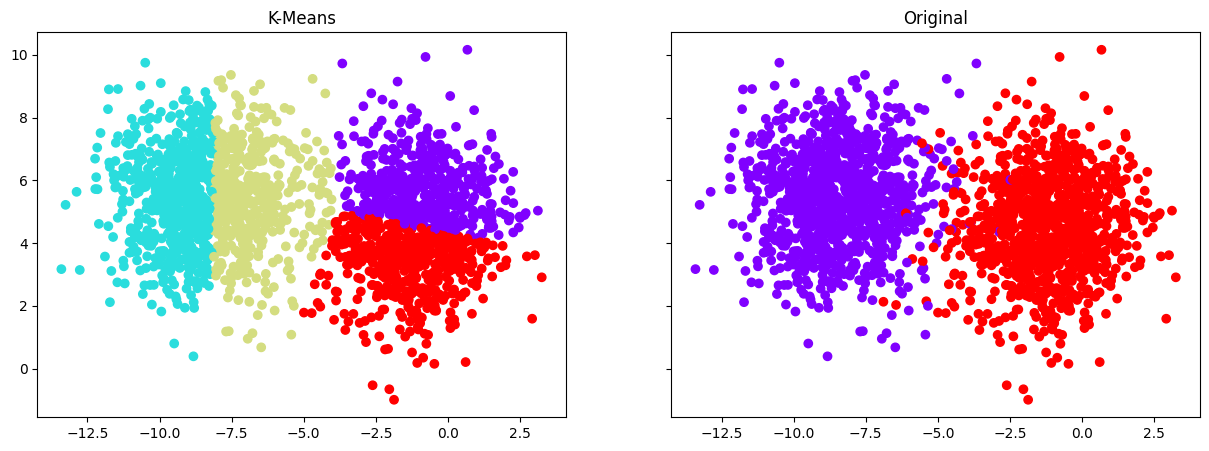

In [41]:
clusters = [2, 3, 4]
iter = [1,10,50,100,200,400 ]

kmeans_coesao_values = []
kmeans_silhueta_values = []
kmeans_rand_score_values = []
kmeans_homogeneidade_values = []
kmeans_completude_values = []
kmeans_matriz_contingencia_values = []
kmeans_clusters = []
kmeans_iter = []


for i in (clusters):
  for j in iter:
    kmeans = KMeans(n_clusters=i, max_iter=100,random_state=15)
    DadosTreino = pd.DataFrame(df,columns=dados.columns[:-1])
    kmeans.fit(DadosTreino)
    X = kmeans.labels_
    plotagraficos(X,'K-Means')

    '''

    plotagraficos(X,'K-Means')
    print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",kmeans.inertia_)
    print("\nCoesão: ",math.sqrt(kmeans.inertia_)/kmeans.n_clusters)
    print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(DadosTreino,kmeans.labels_))
    print("\nRand Score K-means: ",metrics.rand_score(df['label'],kmeans.labels_))
    print("\nHomogeneidade : ",metrics.homogeneity_score(df['label'],kmeans.labels_))
    print("\nCompletude : ",metrics.completeness_score(df['label'],kmeans.labels_))
    print("\nMatriz de contingência kmeans\n", contingency_matrix(df['label'], kmeans.labels_))
    print("Cluster: ", i)
    print("Max iter: ", j)

    '''
    

    kmeans_coesao = math.sqrt(kmeans.inertia_) / kmeans.n_clusters
    kmeans_silhueta = metrics.silhouette_score(DadosTreino, kmeans.labels_)
    kmeans_rand_score = metrics.rand_score(df['label'], kmeans.labels_)
    kmeans_homogeneidade = metrics.homogeneity_score(df['label'], kmeans.labels_)
    kmeans_completude = metrics.completeness_score(df['label'], kmeans.labels_)
    kmeans_matriz_contingencia = contingency_matrix(df['label'], kmeans.labels_)


    kmeans_clusters.append(i)
    kmeans_iter.append(j)
    kmeans_coesao_values.append(kmeans_coesao)
    kmeans_silhueta_values.append(kmeans_silhueta)
    kmeans_rand_score_values.append(kmeans_rand_score)
    kmeans_homogeneidade_values.append(kmeans_homogeneidade)
    kmeans_completude_values.append(kmeans_completude)
    kmeans_matriz_contingencia_values.append(kmeans_matriz_contingencia)




In [42]:
data = {
    'KMeans Clusters': kmeans_clusters,
    'KMeans Iter': kmeans_iter,
    'Coesão': kmeans_coesao_values,
    'Coeficiente de Silhueta': kmeans_silhueta_values,
    'Rand Score K-means': kmeans_rand_score_values,
    'Homogeneidade': kmeans_homogeneidade_values,
    'Completude': kmeans_completude_values,
    'Matriz de Contingência K-means': kmeans_matriz_contingencia_values
}

dfKmeans = pd.DataFrame(data)
display(dfKmeans)

dfKmeans.to_csv("KMeans.csv",sep=";", index=False)


,KMeans Clusters,KMeans Iter,Coesão,Coeficiente de Silhueta,Rand Score K-means,Homogeneidade,Completude,Matriz de Contingência K-means
0,2,1,49.440308,0.621876,0.975300,0.903069,0.903070,"[[13, 987], [988, 12]]"
1,2,10,49.440308,0.621876,0.975300,0.903069,0.903070,"[[13, 987], [988, 12]]"
2,2,50,49.440308,0.621876,0.975300,0.903069,0.903070,"[[13, 987], [988, 12]]"
3,2,100,49.440308,0.621876,0.975300,0.903069,0.903070,"[[13, 987], [988, 12]]"
4,2,200,49.440308,0.621876,0.975300,0.903069,0.903070,"[[13, 987], [988, 12]]"
5,2,400,49.440308,0.621876,0.975300,0.903069,0.903070,"[[13, 987], [988, 12]]"
6,3,1,29.930733,0.423267,0.845982,0.873954,0.578484,"[[376, 2, 622], [53, 947, 0]]"
7,3,10,29.930733,0.423267,0.845982,0.873954,0.578484,"[[376, 2, 622], [53, 947, 0]]"
8,3,50,29.930733,0.423267,0.845982,0.873954,0.578484,"[[376, 2, 622], [53, 947, 0]]"
9,3,100,29.930733,0.423267,0.845982,0.873954,0.578484,"[[376, 2, 622], [53, 947, 0]]"


# DBScan


Rand Score K-means:  0.8960115057528765

Homogeneidade :  0.8640713688850248

Completude :  0.6282187834574203

Matriz de contingência kmeans
 [[100 896   4]
 [106   3 891]]


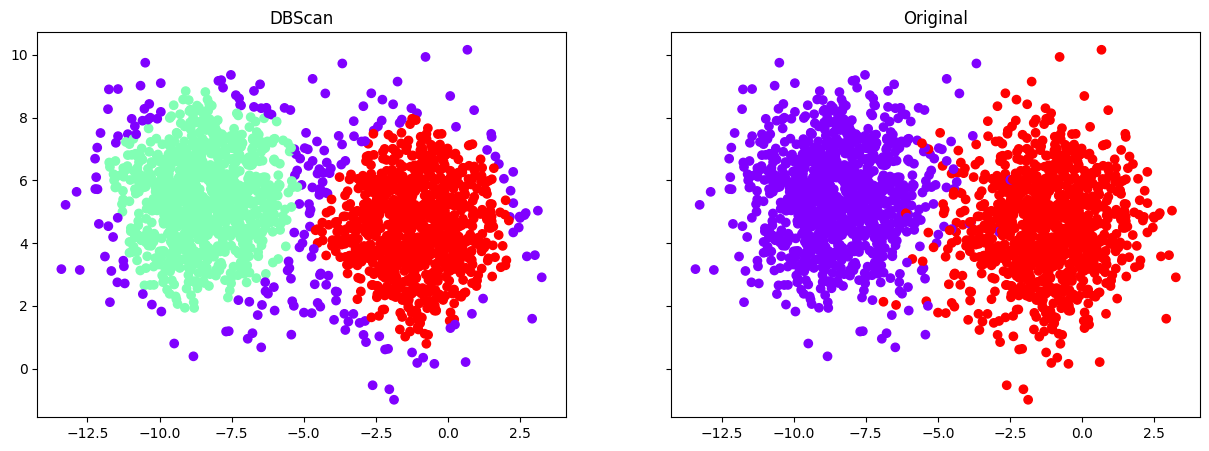

In [52]:
DadosTreino = pd.DataFrame(df,columns=df.columns[:-1])
db = DBSCAN(eps=0.7, min_samples=25)
db.fit(DadosTreino)
X = db.labels_
plotagraficos(X,'DBScan')

#print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",db.inertia_)

#print("\nCoesão: ",math.sqrt(db.inertia_)/db.n_clusters)

#print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(DadosTreino,db.labels_))

print("\nRand Score K-means: ",metrics.rand_score(dados['label'],db.labels_))
print("\nHomogeneidade : ",metrics.homogeneity_score(dados['label'],db.labels_))
print("\nCompletude : ",metrics.completeness_score(dados['label'],db.labels_))
print("\nMatriz de contingência kmeans\n", contingency_matrix(dados['label'], db.labels_))


In [55]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
import math

# Suponha que você já tenha seus dados em um DataFrame chamado "df"
DadosTreino = pd.DataFrame(df, columns=df.columns[:-1])

eps_values = [0.5, 0.7, 1.0]  
min_samples_values = [10, 25, 50]  

dbscan_eps_values = []
dbscan_min_samples_values = []

dbscan_silhueta_values = []
dbscan_rand_score_values = []
dbscan_homogeneidade_values = []
dbscan_completude_values = []
dbscan_matriz_contingencia_values = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        db.fit(DadosTreino)
        X = db.labels_
        

        #coesao = math.sqrt(db.inertia_) / len(set(db.labels_))
        
        silhueta = metrics.silhouette_score(DadosTreino, db.labels_)
        rand_score = metrics.rand_score(df['label'], db.labels_)
        homogeneidade = metrics.homogeneity_score(df['label'], db.labels_)
        completude = metrics.completeness_score(df['label'], db.labels_)
        matriz_contingencia = contingency_matrix(df['label'], db.labels_)

        #dbscan_coesao_values.append(coesao)
        dbscan_silhueta_values.append(silhueta)
        dbscan_rand_score_values.append(rand_score)
        dbscan_homogeneidade_values.append(homogeneidade)
        dbscan_completude_values.append(completude)
        dbscan_matriz_contingencia_values.append(matriz_contingencia)
        
        dbscan_eps_values.append(eps)
        dbscan_min_samples_values.append(min_samples)




In [ ]:
data = {
    'DBScan Clusters': dbscan_eps_values,
    'DBScan Iter': dbscan_min_samples_values,
     #'Coesão': kmeans_coesao_values,
    'Coeficiente de Silhueta': dbscan_silhueta_values,
    'Rand Score DBScan': dbscan_rand_score_values,
    'Homogeneidade': dbscan_homogeneidade_values,
    'Completude': dbscan_completude_values,
    'Matriz de Contingência DBScan': dbscan_matriz_contingencia_values
}

dfKmeans = pd.DataFrame(data)
display(dfKmeans)

dfKmeans.to_csv("KMeans.csv",sep=";", index=False)
